In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns 
from imblearn.over_sampling import SMOTE 
from sklearn.feature_extraction.text import TfidfVectorizer 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.pipeline import Pipeline 
from collections import Counter 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc, confusion_matrix

In [3]:
#Load the dataset
df=pd.read_csv('D:\ML_personifwy\email.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Preprocessing
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns

Index(['Category', 'Message'], dtype='object')

[]

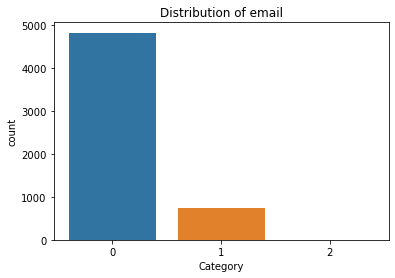

In [7]:
#Exploratory data analysis (EDA)
sns.countplot(x='Category', data=df)
plt.title('Distribution of email')
plt.plot()

In [8]:
pip install imblearn

In [9]:
min_samples=2
counts=df['Category'].value_counts()
to_keep=counts[counts>=min_samples].index
df=df[df['Category'].isin(to_keep)]


In [10]:
vectorizer=TfidfVectorizer(stop_words='english', max_features=3000)
x=vectorizer.fit_transform(df['Message'])
y=df['Category']

In [11]:
over=SMOTE(k_neighbors=2)


In [12]:
x_resampled, y_resampled=over.fit_resample(x,y)


[]

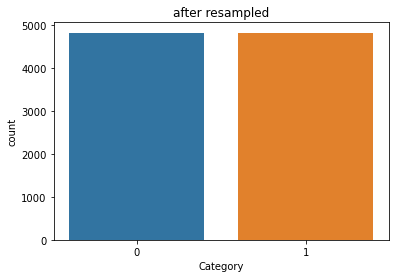

In [13]:
#after resample
sns.countplot(x=y_resampled)
plt.title('after resampled')
plt.plot()

In [14]:
x_train, x_test, y_train, y_test=train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)


In [15]:
# Train the model (Support vector)
model=SVC(kernel='linear', probability=True, random_state=42)
model.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [16]:
y_train_pred=model.predict(x_train)
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3984
           1       0.96      1.00      0.98      3736

    accuracy                           0.98      7720
   macro avg       0.98      0.98      0.98      7720
weighted avg       0.98      0.98      0.98      7720



In [17]:
y_test_pred=model.predict(x_test)
y_test_probs=model.decision_function(x_test)

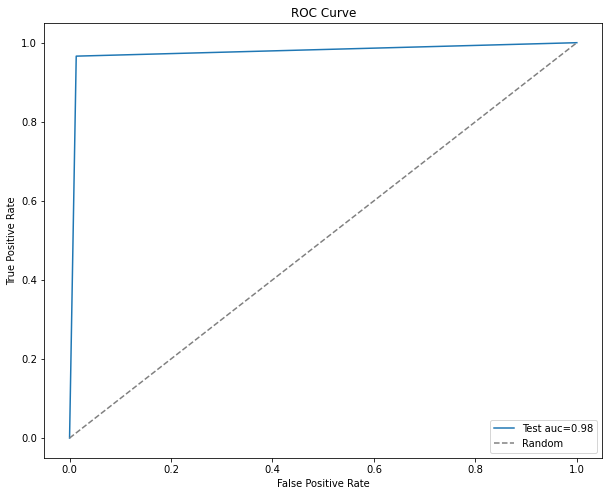

In [23]:
# ROC curve
fpr, tpr, _=roc_curve(y_test, y_test_pred)
test_auc=roc_auc_score(y_test, y_test_pred)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label=f'Test auc={test_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

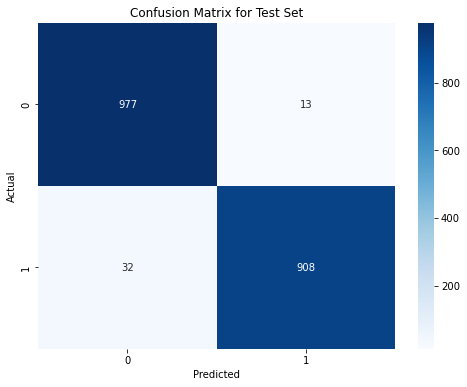

In [24]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()